# KAGGLE-NYC-AIRBNB

This Jupyter Notebook file contains parts of the code for the final project, but with added testing/debugging code and quick visualizations.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Import data from the original file
data = pd.read_csv("../data/AB_NYC_2019.csv", index_col=0)
print("Initial size:",len(data), "x", len(data.columns))
# Remove the columns with a lot (20%) of missing values
data = data.drop(columns=['last_review', 'reviews_per_month'])
# Remove the rows with some missing values (37 rows)
data = data.dropna()
data

Initial size: 48895 x 15


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27


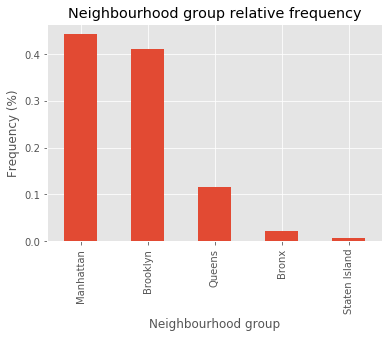

In [6]:
plt.title("Neighbourhood group relative frequency")
plt.xlabel("Neighbourhood group")
plt.ylabel("Frequency (%)")
(data['neighbourhood_group'].value_counts()/sum(data['neighbourhood_group'].value_counts())).plot(kind='bar')

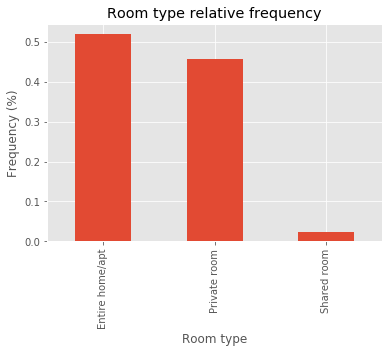

In [7]:
plt.title("Room type relative frequency")
plt.xlabel("Room type")
plt.ylabel("Frequency (%)")
(data['room_type'].value_counts()/sum(data['room_type'].value_counts())).plot(kind='bar')

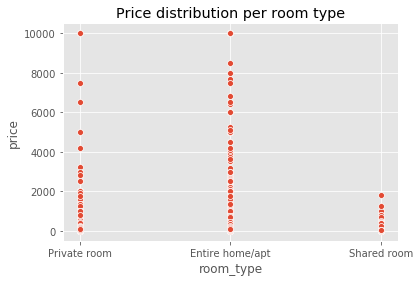

In [13]:
plt.title("Price distribution per room type")
sns.scatterplot(x ="room_type", y ="price", data = data)

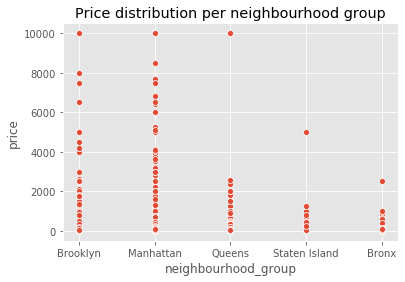

In [14]:
plt.title("Price distribution per neighbourhood group")
sns.scatterplot(x ="neighbourhood_group", y ="price", data = data)

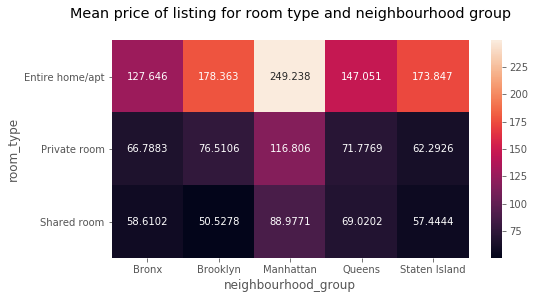

In [51]:
# Display the mean price for listings based on the room type and neighbourhood group
rcParams['figure.figsize'] = 8,4
plt.title("Mean price of listing for room type and neighbourhood group\n")
tab = pd.crosstab(data['room_type'],data['neighbourhood_group'], aggfunc='mean', values=data['price'])
sns.heatmap(tab,annot=True, fmt='g')

In [ ]:
#tab2 = pd.crosstab(data['neighbourhood'],data['room_type'], aggfunc='mean', values=data['price'])
#tab2.sort_values('neighbourhood', ascending=False).plot(kind='barh', figsize=(10,70))

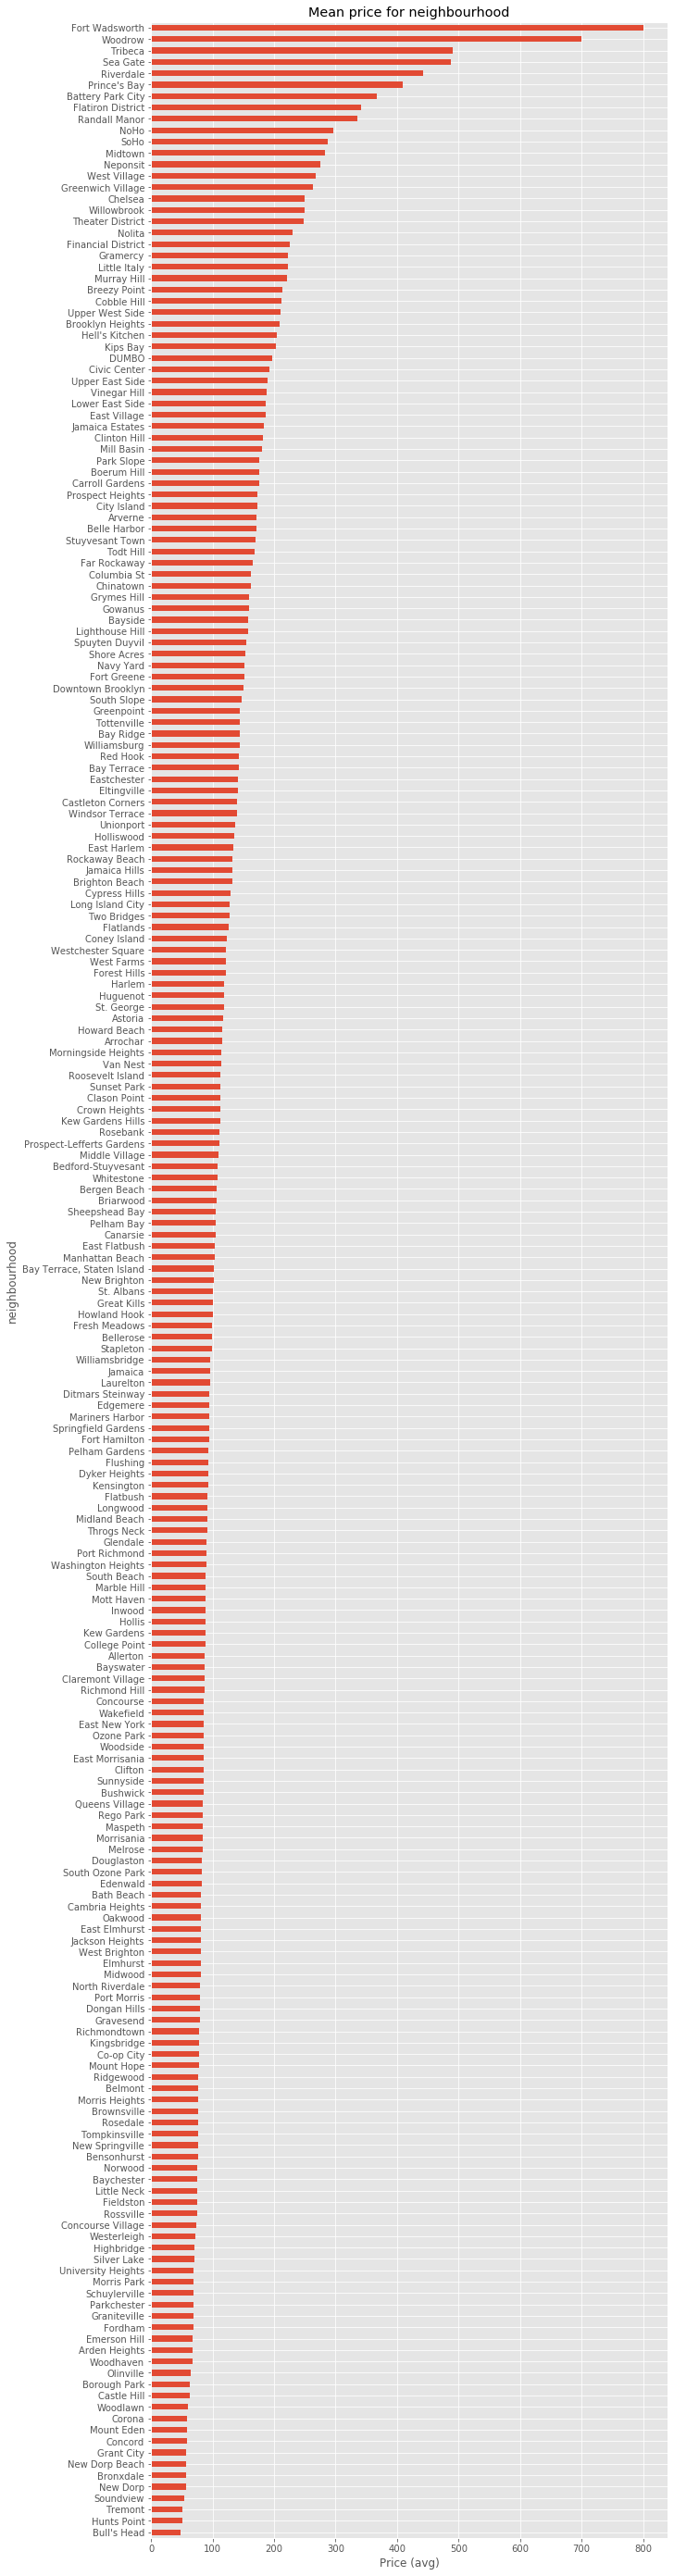

In [20]:
plt.figure(figsize=(10,50))
plt.title("Mean price for neighbourhood")
plt.xlabel("Price (avg)")
plt.ylabel("Neighbourhood")
data['price'].groupby(data['neighbourhood']).mean().sort_values().plot(kind='barh')

In [ ]:
# Itemset mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Setup data
# ...
apriori(data, min_support=5/len(data), use_colnames=True)

In [5]:
data.price.max()

10000

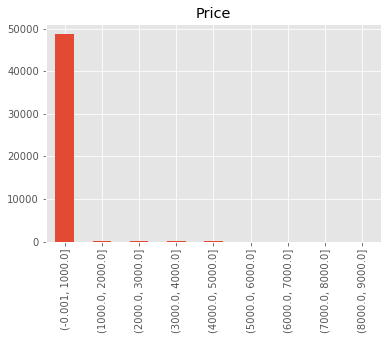

In [10]:
data2 = data.copy()
price_cats1 = pd.cut(data2['price'], bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000], include_lowest=True)
price_cats1.value_counts(sort=False).plot(kind='bar', figsize=(6,4), title='Price')

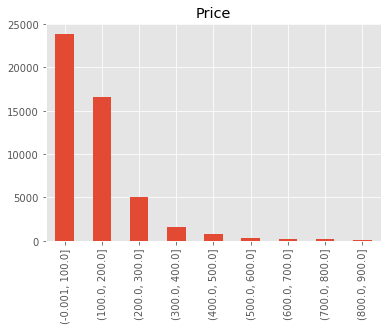

In [11]:
price_cats2 = pd.cut(data2['price'], bins=[0,100,200,300,400,500,600,700,800,900], include_lowest=True)
price_cats2.value_counts(sort=False).plot(kind='bar', figsize=(6,4), title='Price')

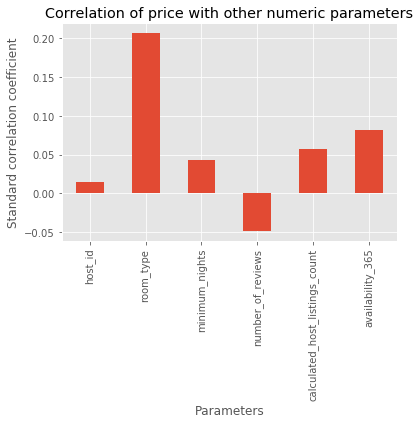

In [29]:
plt.title("Correlation of price with other numeric parameters")
plt.xlabel("Parameters")
plt.ylabel("Standard correlation coefficient")

data2 = data.copy()
data2 = data2.replace('Private room', 0)
data2 = data2.replace('Entire home/apt', 1)
data2 = data2.replace('Shared room', 2)
data2.drop(columns=['price', 'latitude', 'longitude']).corrwith(data2['price']).plot(figsize=(6,4), kind='bar')

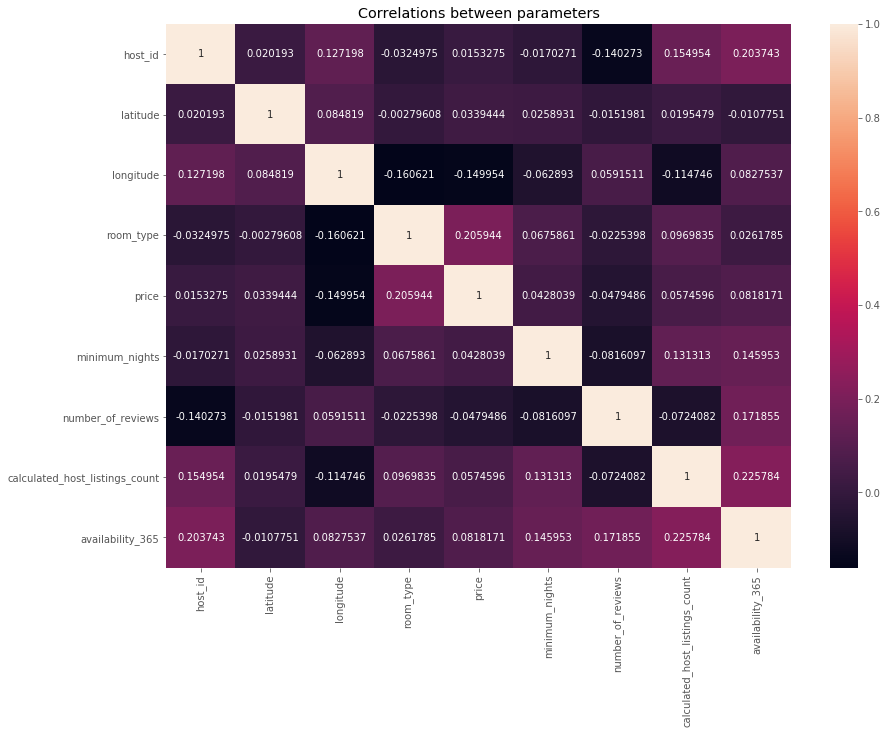

In [32]:
# Display the correlations between all parameters (nothing too strong)
rcParams['figure.figsize'] = 14,10
plt.title("Correlations between parameters")
sns.heatmap(data2.corr(),annot=True, fmt='g')

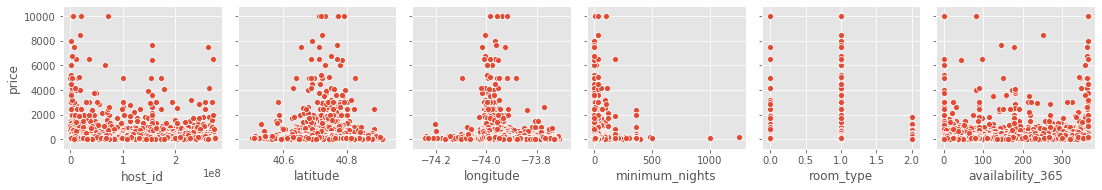

In [36]:
# Correlations between the price and other numeric parameters
sns.pairplot(data=data2, x_vars=['host_id', 'latitude', 'longitude', 'minimum_nights', 'room_type', 'availability_365'], y_vars=['price'], kind='scatter')

In [38]:
# Create the bounding box (tuple) for the map plot
box = (round(data.longitude.min(),4), round(data.longitude.max(),4), round(data.latitude.min(),4), round(data.latitude.max(),4))
box

(-74.2444, -73.713, 40.4998, 40.9131)

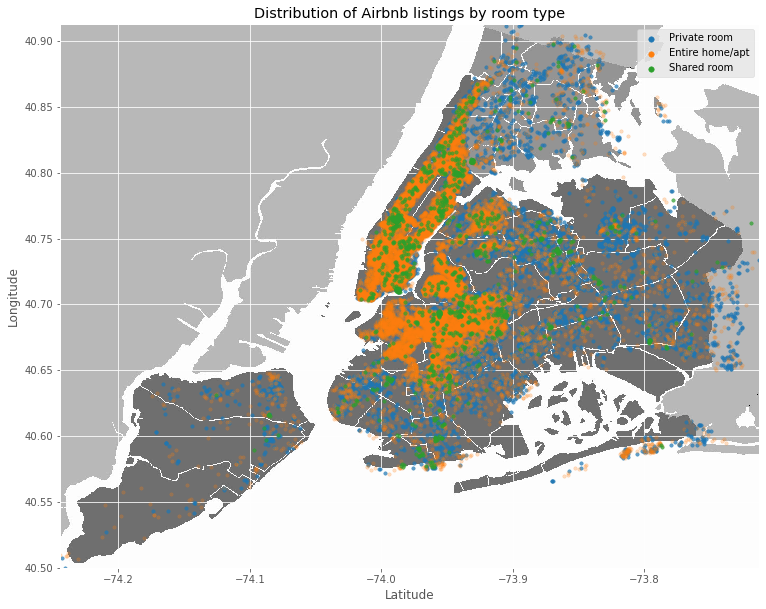

In [41]:
rcParams['figure.figsize'] = 14,10
# Create scatterplots for each room type on the map of NYC
fig, ax = plt.subplots()
ax.scatter(data[data.room_type=="Private room"].longitude, 
           data[data.room_type=="Private room"].latitude, 
           alpha= 0.7, c='tab:blue', s=12)

# Less opacity due to it being way too dense and bright
ax.scatter(data[data.room_type=="Entire home/apt"].longitude, 
           data[data.room_type=="Entire home/apt"].latitude, 
           alpha= 0.25, c='tab:orange', s=12)

ax.scatter(data[data.room_type=="Shared room"].longitude, 
           data[data.room_type=="Shared room"].latitude, 
           alpha= 0.7, c='tab:green', s=12)

# Limit the plots by the size of the map
ax.set_xlim(box[0],box[1])
ax.set_ylim(box[2],box[3])

# Update the legend opacity and size for better visibility
legend = ax.legend(['Private room', 'Entire home/apt', 'Shared room'])
for lh in legend.legendHandles: 
    lh.set_alpha(1)
    lh.set_sizes([30])
    
plt.title("Distribution of Airbnb listings by room type")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
    
ax.imshow(plt.imread("../data/NYC.jpg"), zorder=0, extent = box, aspect='equal')

In [53]:
# Split the data into training and testing data (30% goes to testing)
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['price', 'name', 'host_name']), 
                                                    data['price'], test_size = 0.30, random_state = 0)

In [54]:
# Connect training and testing data into a single dataframe
train = X_train.copy()
train['source'] = 'train'
test = X_test.copy()
test['source'] = 'test'
data3 = pd.concat([train, test])

# Use one-hot encoding to transform non-binary data into binary data
data_dum = pd.get_dummies(data3, columns=data3.drop(columns=['source']).select_dtypes(object).columns)
data_dum.head()

,host_id,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,source,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,,,,,
6323975,32904968,40.75815,-73.99374,1,0,1,0,train,0,0,...,0,0,0,0,0,0,0,0,0,1
26985149,1836803,40.68872,-73.93183,3,1,1,17,train,0,1,...,0,0,0,0,0,0,0,1,0,0
26925980,38593087,40.70685,-73.96663,1,25,2,64,train,0,1,...,1,0,0,0,0,0,0,0,1,0
35600877,163625145,40.64468,-73.99026,2,2,3,180,train,0,1,...,0,0,0,0,0,0,0,0,1,0
35985735,70538107,40.68834,-73.90714,1,0,1,16,train,0,1,...,0,0,0,0,0,0,0,0,1,0


In [55]:
# Split the data into training and testing partitions once again
train = data_dum[data_dum.source == 'train'].drop(columns=['source'])
test = data_dum[data_dum.source == 'test'].drop(columns=['source'])

In [56]:
# Create a dataframe for saving the results of the models
df = pd.DataFrame({'id': test.index, 'actual_price': np.array(y_test)})

# Linear regression model
reg = LinearRegression()
reg_fit = reg.fit(train, y_train)
pred_linreg = reg_fit.predict(test)
df['price_linreg'] = pred_linreg

In [60]:
# RandomForest model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rf_fit = rf.fit(train, y_train)
pred_rf = rf.predict(test)
df['price_rf'] = pred_rf

# # Hyperparameter tuning
# random_grid = {'n_estimators': [50,100,200,300,500],
#                'max_depth': [10,20,50,150],
#                'min_samples_split': [0.3,0.5,0.9],
#                'min_samples_leaf': [2,5,10,25]}

# rf2 = RandomForestClassifier()
# grid = GridSearchCV(rf2, random_grid)
# grid.fit(train, y_train)
# pred_rf_best = grid.predict(test)
# df['price_rf_best'] = pred_rf_best

df

,id,actual_price,price_linreg,price_rf
0,22095324,70,89.376282,60
1,36480292,120,180.861678,150
2,10729951,105,48.398863,50
3,4103970,100,129.844585,60
4,23337201,59,85.928893,60
...,...,...,...,...
14653,15067291,64,91.369756,60
14654,14716155,55,67.996095,50
14655,11023993,60,51.043572,50
14656,13264690,55,89.486879,60


In [61]:
print("RF accuracy:", round(accuracy_score(df.actual_price, df.price_rf)*100,2), "%")
#print("RF confusion matrix:")
#print(confusion_matrix(df.actual_price, df.price_rf))

RF accuracy: 8.8 %


In [63]:
# KNN models
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(train, y_train)
pred_knn3 = knn3.predict(test)
df['price_knn3'] = pred_knn3

knn30 = KNeighborsClassifier(n_neighbors=30)
knn30.fit(train, y_train)
pred_knn30 = knn30.predict(test)
df['price_knn30'] = pred_knn30

knn100 = KNeighborsClassifier(n_neighbors=100)
knn100.fit(train, y_train)
pred_knn100 = knn100.predict(test)
df['price_knn100'] = pred_knn100

# Hyperparameter tuning

# random_grid = {'leaf_size': [1,20,35,50,75,90,100],
#                'n_neighbors': [i for i in range(1,50,15)]}

# knn_best = KNeighborsClassifier()
# grid = GridSearchCV(knn_best, random_grid)
# grid.fit(train, y_train)
# pred_knn_best = grid.predict(test)
# df['price_knn_best'] = pred_knn_best

df

,id,actual_price,price_linreg,price_rf,price_knn3,price_knn30,price_knn100
0,22095324,70,89.376282,60,57,250,100
1,36480292,120,180.861678,150,129,79,70
2,10729951,105,48.398863,50,125,249,150
3,4103970,100,129.844585,60,75,120,75
4,23337201,59,85.928893,60,59,50,50
...,...,...,...,...,...,...,...
14653,15067291,64,91.369756,60,55,40,60
14654,14716155,55,67.996095,50,40,50,50
14655,11023993,60,51.043572,50,50,50,50
14656,13264690,55,89.486879,60,45,100,100


Text(0.5, 0, 'Predicted price')

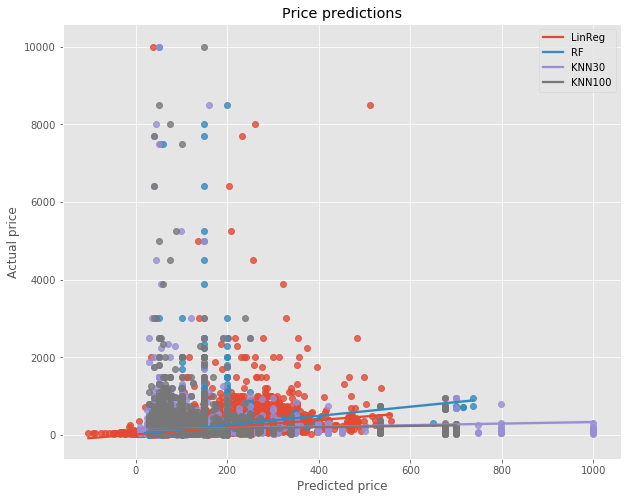

In [74]:
# Model visualizations
rcParams['figure.figsize'] = 10,8
plt.title("Price predictions")
sns.regplot(y=df.actual_price,x=df.price_linreg)
sns.regplot(y=df.actual_price,x=df.price_rf)
#sns.regplot(y=df.actual_price,x=df.price_knn3)
sns.regplot(y=df.actual_price,x=df.price_knn30)
sns.regplot(y=df.actual_price,x=df.price_knn100)
#sns.regplot(y=df.actual_price,x=df.price_knn_best)
plt.legend(['LinReg', 'RF', 'KNN30', 'KNN100'])
plt.ylabel("Actual price")
plt.xlabel("Predicted price")

In [68]:
print("KNN3 Accuracy:", accuracy_score(df.actual_price, df.price_knn3)*100, "%")
print("KNN3 Accuracy:", accuracy_score(df.actual_price, df.price_knn30)*100, "%")
print("KNN3 Accuracy:", accuracy_score(df.actual_price, df.price_knn100)*100, "%")

KNN3 Accuracy: 5.873925501432665 %
KNN3 Accuracy: 4.6732159912675675 %
KNN3 Accuracy: 4.291172056215036 %


In [ ]:
# Trying out predictions of neighbourhood_group

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['neighbourhood_group', 'name', 'host_name']), 
                                                    data['neighbourhood_group'], test_size = 0.30, random_state = 0)

train = X_train.copy()
train['source'] = 'train'
test = X_test.copy()
test['source'] = 'test'

data3 = pd.concat([train, test])
data_dum = pd.get_dummies(data3, columns=data3.drop(columns=['source']).select_dtypes(object).columns)
data_dum.head()

train = data_dum[data_dum.source == 'train'].drop(columns=['source'])
test = data_dum[data_dum.source == 'test'].drop(columns=['source'])

train

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_Allerton,neighbourhood_Arden Heights,...,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
id,,,,,,,,,,,,,,,,,,,,,
6323975,32904968,40.75815,-73.99374,130,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
26985149,1836803,40.68872,-73.93183,130,3,1,1,17,0,0,...,0,0,0,0,0,0,0,1,0,0
26925980,38593087,40.70685,-73.96663,82,1,25,2,64,0,0,...,1,0,0,0,0,0,0,0,1,0
35600877,163625145,40.64468,-73.99026,46,2,2,3,180,0,0,...,0,0,0,0,0,0,0,0,1,0
35985735,70538107,40.68834,-73.90714,45,1,0,1,16,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916234,112957166,40.73948,-73.97643,73,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35003827,263712096,40.74833,-73.98162,150,1,2,3,73,0,0,...,0,0,0,0,0,0,0,0,1,0
33111095,153356660,40.69594,-73.90685,75,1,0,1,83,0,0,...,0,0,0,0,0,0,0,0,1,0
